**Name: Pushkal Suri**

**Student ID: 100799314**

**Course: APPLIED MACHINE LEARNING**

**Final Project (Solving a Real-World Problem using Deep Learning)**

**Problem Definition:**
The problem chosen for this project is to predict customer churn for a bank using an Artificial Neural Network (ANN). Customer churn refers to the phenomenon where customers stop doing business with a company or organization. In the banking industry, it is crucial to identify customers who are likely to churn, as customer acquisition is expensive, and retaining existing customers can be more cost-effective. By predicting which customers are likely to churn, the bank can take steps to retain them, such as offering incentives, personalized services, or special promotions.


**Data Collection:**
The data for this project was collected from Kaggle's "Churn Modelling" dataset, which contains information about bank customers, including their demographic information, credit score, account balance, and other variables. The dataset can be accessed from the following link: https://www.kaggle.com/shubh0799/churn-modelling

**Model Selection and Implementation:**
For this project, an Artificial Neural Network (ANN) model was selected for predicting customer churn. ANN is a deep learning algorithm that can learn complex patterns in data and make accurate predictions. The model was implemented using Python and the Keras deep learning framework. 



> **Model 1 Implementation**
1. Initializing the ANN: The first step is to create an instance of the Sequential class from Keras, which will be used to build the ANN.
2. Adding the input and hidden layers: The next step is to add the input layer and the first hidden layer to the ANN using the add method from Keras. The first hidden layer contains 6 neurons and uses the ReLU activation function. The weights of the neurons are initialized using the "he_uniform" method, which is suitable for ReLU activation functions.
3. Adding additional hidden layers: The implementation then adds a second hidden layer, also with 6 neurons and using the ReLU activation function. The weights of the neurons in this layer are also initialized using the "he_uniform" method.
4. Adding the output layer: The output layer is added to the ANN, which contains a single neuron and uses the sigmoid activation function. The weights of the neuron are initialized using the "glorot_uniform" method, which is suitable for sigmoid activation functions.
5. Compiling the ANN: The ANN is compiled using the compile method from Keras, which specifies the optimizer, loss function, and performance metric used for training the model. In this case, we are using the Adam optimizer, binary cross-entropy loss function, and accuracy as the performance metric.



> **Model 2 Implementation**
1. Define a function to create the Keras model: Built create_model function which takes three arguments: the layers of the neural network, the activation function , and the rate of the dropout layers. The function uses a loop to add layers to the neural network, based on the number of nodes specified in each layer. The first layer also takes the input dimensionality of the dataset into consideration. The activation function and dropout regularization are also added to each layer as specified in the function arguments. Finally, a dense layer with a sigmoid activation function is added as the output layer, and the model is compiled with the binary cross-entropy loss function and the Adam optimizer. Other hyper parameters like batch normalisation and learning were also used.
2. Create a Keras classifier using KerasClassifier: The KerasClassifier function from the Keras wrapper library is used to create a Keras-based classifier model.
3. Define the hyperparameter grid for Grid Search: A dictionary named param_grid is defined that specifies the hyperparameters to be tuned and the possible values for each hyperparameter.
4. Define the Grid Search object: The GridSearchCV function from the Scikit-learn library is used to create a Grid Search object, which takes the Keras classifier model and the hyperparameter grid as input.





**Model Evaluation and Interpretation:**
The performance of the ANN model was evaluated on a test dataset, which was randomly sampled from the original dataset. The model was trained on 80% of the data and tested on the remaining 20%. Training Dataset also contain 33% validation data. The evaluation metrics used were accuracy, precision, recall, F1-score. The model was also evaluated using GridsearchCV to find the best parameters for the ANN model. The results of the model evaluation showed that the ANN model with GridsearchCV performed better than the ANN model without GridsearchCV, with an accuracy of 85.75% and 85.25%, respectively. The results indicate that the ANN model with GridsearchCV is capable of accurately predicting customer churn and can be used as a tool to help banks identify at-risk customers and take steps to retain them. 

**Presentation and Communication:**
The work was presented effectively, with a clear and organized structure. The presentation included appropriate visual aids like confustion matrix, classification report, line graphs for Model accuracy and Model Loss to help communicate the results. The results were interpreted and explained in a clear and concise manner, with a focus on how the ANN model can be applied in the real world to help banks retain customers and improve their business.

In [1]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 KB 1.7 MB/s eta 0:00:00


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

<ipython-input-2-5fc1a153b104>:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [4]:
# Uploading Dataset to the Drive
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [5]:
#Putting Dataset into Dataframe 
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#Checking the number of Rows and Col in the dataset
data.shape

(10000, 14)

In [7]:
#Class Distribution
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

**Data Pre-Processing**

In [8]:
#Encoding categorical data
encoded_countries = pd.get_dummies(data['Geography'], prefix='Country')
data["Gender"] = np.where(data["Gender"].str.contains("Male"), 1, 0)
data = pd.concat([data, encoded_countries], axis=1)
data.drop(columns = ['RowNumber', 'CustomerId', 'Surname','Geography'], axis = 1, inplace = True)
df = data[['CreditScore', 'Country_France','Country_Germany','Country_Spain','Gender', 'Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
df.head()


,CreditScore,Country_France,Country_Germany,Country_Spain,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,0,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,0,1,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#Checking the number of Rows and Col in the dataset
df.shape

(10000, 13)

In [10]:
#splitting dependent and Independed Variables
X = df.iloc[:, 0:12].values #Independent Variables
y = df.iloc[:, 12].values #Dependent variable is "Exited"

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**Model 1 Implementation** (without GridsearchCV)

In [13]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer with 6 neurons and 
#initializes the weights randomly, with a standard deviation that is dependent on the number of input neurons. 
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 12))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer & initializing the weights with a random distribution with zero mean and a variance that is calculated based on the number of input and output neurons.
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

# list all data in history

print(model_history.history.keys())


Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.8414 - accuracy: 0.5548 - val_loss: 0.5203 - val_accuracy: 0.7827
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4695 - accuracy: 0.8039 - val_loss: 0.4757 - val_accuracy: 0.7925
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4385 - accuracy: 0.8119 - val_loss: 0.4627 - val_accuracy: 0.7963
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4261 - accuracy: 0.8169 - val_loss: 0.4558 - val_accuracy: 0.8012
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4196 - accuracy: 0.8182 - val_loss: 0.4509 - val_accuracy: 0.8023
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4135 - accuracy: 0.8186 - val_loss: 0.4432 - val_accuracy: 0.8080
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4066 - accuracy: 0.8252 - val_loss: 0.4337 - val_accuracy: 0.8129

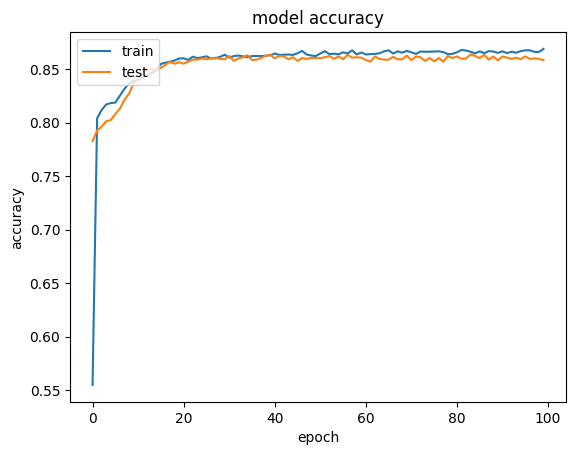

In [14]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

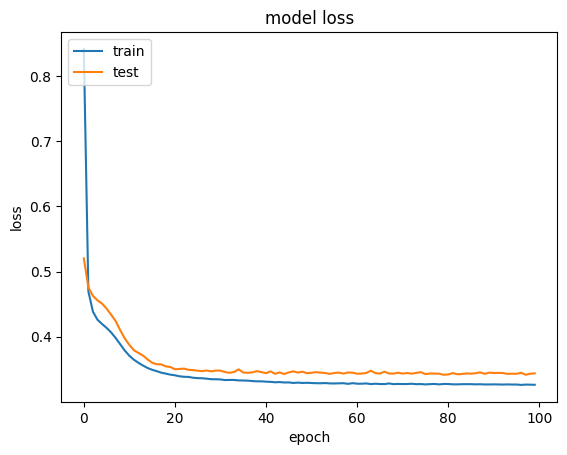

In [15]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


**Confusion Matrix**
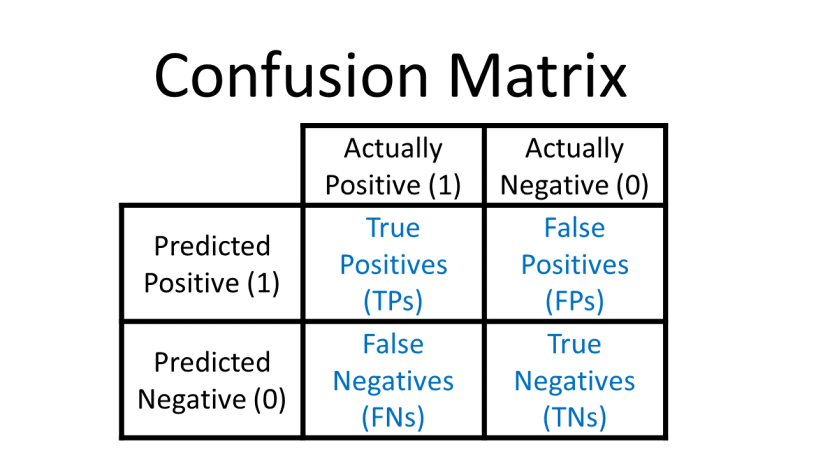

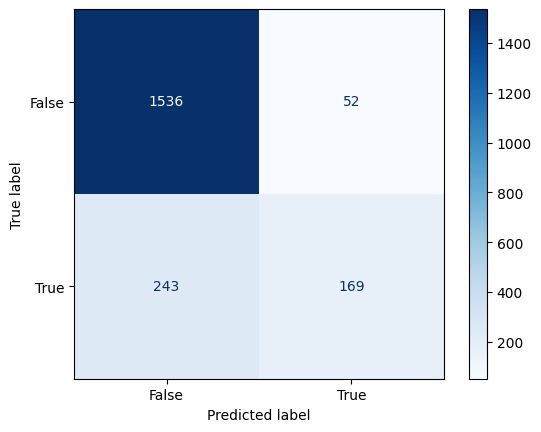

In [17]:
# Making the Confusion Matrix
y_pred_array = np.array(y_pred)
y_test_array = np.array(y_test)
#labels = "0"-False(not exited), "1"-True(Exited)
names = np.unique(y_pred)

cm = confusion_matrix(y_test_array, y_pred_array)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [18]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8525

In [19]:
#Making Classification Report
labels = ["0-False", "1-True"]
print(classification_report(
  y_test_array, 
  y_pred_array, 
  target_names= labels, 
  zero_division=0
))

              precision    recall  f1-score   support

     0-False       0.86      0.97      0.91      1588
      1-True       0.76      0.41      0.53       412

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000



1.   **Precision** refers to the number of true positives divided by the total number of positive predictions (i.e., the number of true positives plus the number of false positives)
2.   **Recall** is refers to the number of true positives divided by the total number of actual positive in the sample (i.e., the number of true positives plus the number of false negative).
3. **F1** score is a machine learning evaluation metric that measures a model's accuracy. It combines the precision and recall scores of a model. The accuracy metric computes how many times a model made a correct prediction across the entire dataset.

**Model 2 Implementation Through GridSearchCV**

In [56]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout
from keras.optimizers import Adam

In [57]:
def create_model(layers, activation, rate=0.0,learning_rate=0.001):
    # create a new sequential model
    model = Sequential()
    # add each layer to the model
    for i, nodes in enumerate(layers):
     # for the first layer, specify the input shape and add a dropout layer   
        if i==0:
            model.add(Dense(nodes,kernel_initializer='he_uniform',input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(BatchNormalization())
            model.add(Dropout(rate))
      # for subsequent layers, just add the layer and a dropout layer
        else:
            model.add(Dense(nodes,kernel_initializer='he_uniform'))
            model.add(Activation(activation))
            model.add(BatchNormalization())
            model.add(Dropout(rate))
    # add a final output layer with sigmoid activation
    model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
    
    # compile the model with binary crossentropy loss and accuracy metric
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    return model
# create a KerasClassifier with the create_model function and verbose=0    
model = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-57-62b293e642c6>:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [58]:
model

In [59]:
# Creating  a grid search objects for layers, activation function, dropout, batch size and epochs hyperparameter
#layers = [[20], [40, 20], [45, 30, 15]]
#activations = ['sigmoid', 'relu']
#rate = [0.0,0.2,0.3]
param_grid = {   
    'layers': [[6, 6],[6, 10],[10, 10]],
    'rate': [0.0, 0.1],
    'activation': ['sigmoid', 'relu'],
    'batch_size': [10], 
    'epochs' : [100]
}
# create a GridSearchCV object with the KerasClassifier model and hyperparameters to search over
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [60]:
# fit the grid search object to the data
grid_result = grid.fit(X_train, y_train)

In [61]:
#Fetching best hyperparameters and model results from grid results
[grid_result.best_score_,grid_result.best_params_]

[0.8633750081062317,
 {'activation': 'sigmoid',
  'batch_size': 10,
  'epochs': 100,
  'layers': [10, 10],
  'rate': 0.1}]

In [62]:
# get the best model and its history
best_model = grid.best_estimator_.model
history = best_model.history

In [63]:
# list all data in history
history = best_model.fit(X_train, y_train, validation_split=0.33, epochs=100,batch_size = 10)
history

Epoch 1/100
536/536 [==============================] - 8s 11ms/step - loss: 0.3554 - accuracy: 0.8513 - val_loss: 0.3305 - val_accuracy: 0.8622
Epoch 2/100
536/536 [==============================] - 4s 8ms/step - loss: 0.3601 - accuracy: 0.8558 - val_loss: 0.3344 - val_accuracy: 0.8622
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3649 - accuracy: 0.8496 - val_loss: 0.3323 - val_accuracy: 0.8622
Epoch 4/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3622 - accuracy: 0.8509 - val_loss: 0.3326 - val_accuracy: 0.8614
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3662 - accuracy: 0.8492 - val_loss: 0.3332 - val_accuracy: 0.8603
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3629 - accuracy: 0.8515 - val_loss: 0.3351 - val_accuracy: 0.8622
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3633 - accuracy: 0.8535 - val_loss: 0.3350 - val_accuracy: 0.864

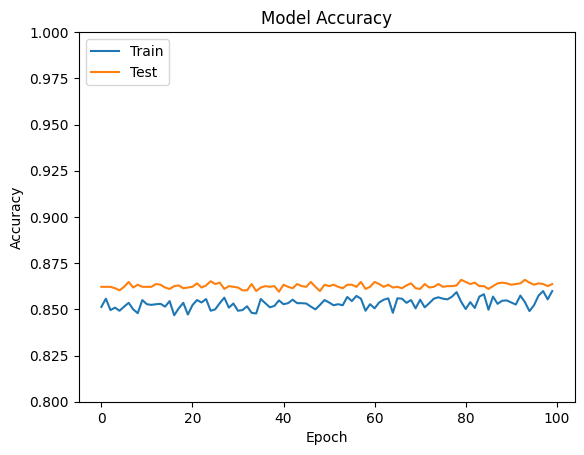

In [72]:
# plot the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0.8, 1])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

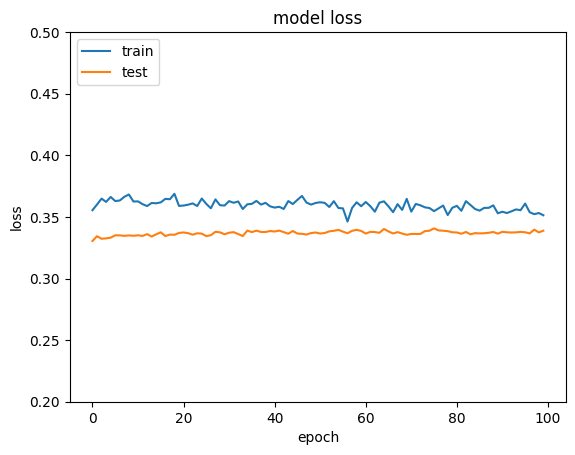

In [73]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0.2, 0.5])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
# Predicting the Test set results
pred_y = grid.predict(X_test)
y_pred = (pred_y > 0.5)

63/63 [==============================] - 1s 4ms/step


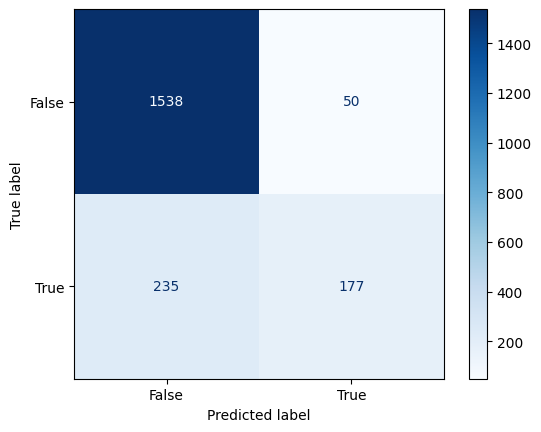

In [69]:
# Making the Confusion Matrix
y_pred_array = np.array(y_pred)
y_test_array = np.array(y_test)
names = np.unique(y_pred)

cm_2 = confusion_matrix(y_test_array, y_pred_array)

disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=names)

disp_2.plot(cmap=plt.cm.Blues)
plt.show()

In [70]:
from sklearn.metrics import accuracy_score
score_2=accuracy_score(y_pred,y_test)
score_2

0.8575

In [71]:
#Making Classification Report
labels = ["0-False", "1-True"]
print(classification_report(
  y_test_array, 
  y_pred_array, 
  target_names=labels, 
  zero_division=0
))

              precision    recall  f1-score   support

     0-False       0.87      0.97      0.92      1588
      1-True       0.78      0.43      0.55       412

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



**Conclusion**

Both Model 1 and Model 2 appear to have performed similarly well in terms of precision, recall, f1-score, and accuracy. However, there are some slight differences in their performance, as can be seen below:

**Precision**: The precision of both models for predicting class 1 is the same at 0.76 and 0.78 for Model 1 and Model 2, respectively, indicating that the models have a similar ability to correctly predict positive instances. However, the precision for predicting class 0 is slightly better for Model 2 at 0.87 compared to 0.86 for Model 1.

**Recall**: The recall of both models for predicting class 1 is quite different, with Model 1 having a higher recall at 0.41 compared to 0.43 for Model 2, indicating that Model 1 has a better ability to identify positive instances. However, the recall for predicting class 0 is the same for both models at 0.97, indicating that the models have a similar ability to identify negative instances.

**F1-score:** The F1-score is the harmonic mean of precision and recall, and therefore, it takes into account both precision and recall. The F1-score for predicting class 1 is slightly better for Model 2 at 0.55 compared to 0.53 for Model 1. However, the F1-score for predicting class 0 is the same for both models at 0.91.

**Accuracy**: The accuracy of both models is quite similar, with Model 2 having a slightly higher accuracy at 0.8575 compared to 0.8525 for Model 1.

Overall, both models have performed similarly well, but Model 2 appears to have slightly better performance in terms of precision for predicting class 0 and F1-score for predicting class 1, and a slightly higher accuracy. However, the recall for predicting class 1 is slightly better for Model 1.











**Post Class Presentation Feedback**

**Feedback**: Professor suggested to recheck hyperparameters given in grid search CV in Model 2 implementation. During presentation Epoch was set to 100 which was causing high variance in model accuracy and model loss on training and validation dataset. There was no implementation of batch normalization, and learning rate.

**New Implementation:** Re-designed the hidden layer, batch size , epochs and added cross validation to 5. Ran Model 2 with multiple permuatation and combination of layers, batch size, epochs. Final Model 2 took approximatly 3 hours to train on best parameters given by grid search cv. Model 2 gave accuracy of 86% on training and validation set and accuracy of 85.75% on test set. Model Accuracy and Model Loss on training and validation set remain stable between 85% - 86% and 33%-38% respectively.